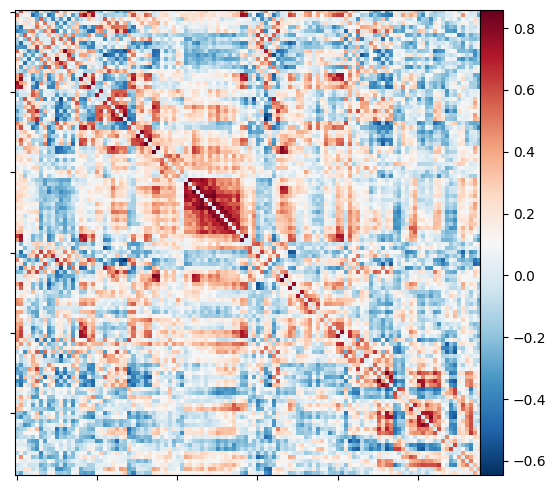

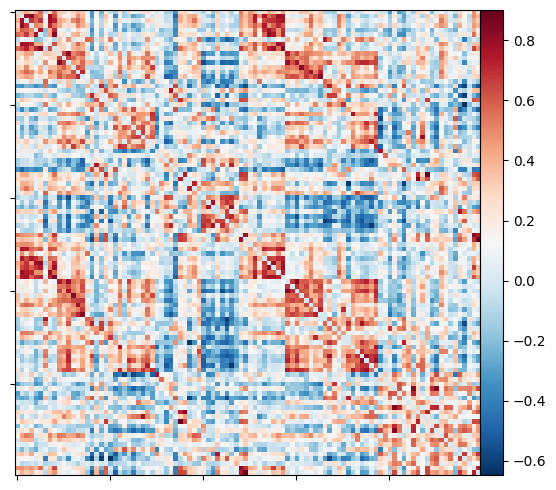

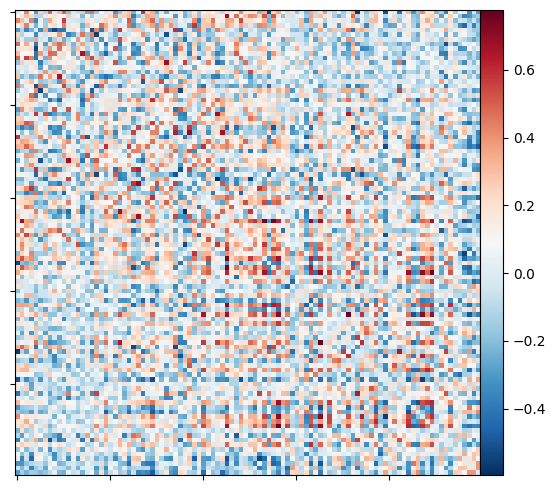

In [6]:
import sys
sys.path.append('../')
from utils import BrainGraphDataset, project_root
import os
from torch.utils.data import DataLoader
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt

dataroot = 'fc_matrices/psilo_schaefer_before'
root = project_root()

annotations = 'annotations.csv'
dataroot = 'fc_matrices/psilo_aal_before/'
aal_dataset = BrainGraphDataset(img_dir=os.path.join(root, dataroot),
                            annotations_file=os.path.join(root, annotations),
                            transform=None, extra_data=None, setting='graph', labelled=True)

annotations = 'annotations.csv'
dataroot = 'fc_matrices/psilo_schaefer_before/'
schaefer_dataset = BrainGraphDataset(img_dir=os.path.join(root, dataroot),
                            annotations_file=os.path.join(root, annotations),
                            transform=None, extra_data=None, setting='graph', labelled=True)

dataroot = 'fc_matrices/psilo_ica_100_before/'
ica_dataset = BrainGraphDataset(img_dir=os.path.join(root, dataroot),
                            annotations_file=os.path.join(root, annotations),
                            transform=None, extra_data=None, setting='graph', labelled=True)

aal_loader = DataLoader(aal_dataset, batch_size=1)
schaefer_loader = DataLoader(schaefer_dataset, batch_size=1)
ica_loader = DataLoader(ica_dataset, batch_size=1)

names = ['aal', 'schaefer', 'ica']

for i, loader in enumerate([aal_loader, schaefer_loader, ica_loader]):
    graph, labels = next(iter(loader))
    
    # Create a graph object using the FC matrix
    graph_obj = plotting.plot_matrix(np.array(graph.view(graph.shape[1], -1)))

    plt.savefig(f'{names[i]}_fc')
    # Display the graph
    plotting.show()